In [19]:
"""
pyswmm and swmmio example: Created by Kazi Tamaddun: 02-03-2021
This script looks at different pyswmm and swmmio functionalities specific to LID Controls
"""

'\npyswmm and swmmio example: Created by Kazi Tamaddun: 02-03-2021\nThis script looks at different pyswmm and swmmio functionalities specific to LID Controls\n'

In [20]:
# You need to install/update swmm, pyswmm, and swmmio packages to execute the codes
from pyswmm import Simulation, Subcatchments, LidControls, LidGroups
import swmmio as sio; import swmm

In [21]:
# Import required packages
import os; import numpy as np; import pandas as pd
import matplotlib.pyplot as plt;
%matplotlib inline
import seaborn as sns; sns.set(color_codes = True); 
# from jupyterthemes import jtplot; jtplot.style(theme = 'oceans16');
# jtplot.style(context ='', fscale =, spines = False, gridlines = '');
# jtplot.style(ticks = True, grid = False, figsize = ());

In [22]:
# Scotts Level Brance (SLB) Model developed in EPA SWMM
inp_dir = r'C:\Users\kat6am\Downloads\UVA_Research\GreenGrayInfrastructure\HMS_RAS_SWMM_iTree\ScottsLevelBranch\SLB_SWMM'

#### Model Visual

<img src="Model_Visual.PNG" align="left"/>

In [61]:
# Load EPA SWMM Model
for file in os.scandir(inp_dir):
    if file.name.endswith('.inp'):
        swmm_inp = file.path # SWMM input file 
        
        control_time_step = 86400*3 # 3 days in seconds - This will be used as the routing step
        # Setting a higher time_step just for printing convenience on Jupyter Runtime
        # The actual simulation still runs at the default value set through EPA SWMM
        
# Trying out different combinations of LID Unit_numbers and LID Unit_Areas 
        uNumbers = np.arange(1,4,1) # Three Options
        uAreas = np.arange(60000,90000,10000) # Three Options
        # A total of 9 combinations 
        for uArea in uAreas:
            for uNumber in uNumbers:
                with Simulation(swmm_inp, reportfile = './pyswmm_Reports/Report_{}_{}.txt'.format(uArea,uNumber)) as sim:
                    # Make sure to update the output directory
                    # The report files will be in this format: 'Report_uArea_uNumber.txt'
                    
                    s1 = Subcatchments(sim)['S1']
                    sim.step_advance(control_time_step)
# LID Controls Module - This lets you access or change individual LID parameters
                    bioRet = LidControls(sim)['BioRet1']
                    # I have a LID Contol named 'BioRet1'
        
                    # As an example, I am only printing two parameters here
                    print('_____________New Run!____________','\n')
                    print('Soil Thickness:',bioRet.soil.thickness,'\n',"Surface Manning's n:",bioRet.surface.roughness)
                    # The following code tells you whether immediate outflow of excess water is allowed or not
                    # You can also change the value (takes only boolean inputs)
                    print(); print(bioRet.can_overflow)

                    # Assign new parameter values
                    bioRet.soil.thickness = 700
                    bioRet.surface.roughness = 0.15 # This is Manning's n
                    print(); print('New Soil Thickness:',bioRet.soil.thickness,
                                   '\n',"New Surface Manning's n:",bioRet.surface.roughness); print()

# LID Groups Module - This lets you access the LIDs assigned to particular Subcatchment
                    lid_sub1 = LidGroups(sim)['S1']
                    # I have a subcatchment named 'S1'
                    print('Number of LID Controls:',len(lid_sub1)) # Checking how many LIDs I have in this subcatchment
                    for lid in lid_sub1:
                        print(lid) 

# LID Units Module - This lets you change LID parameters set within a subcatchment    
                        lid_sub1[0].unit_area = uArea
                        lid_sub1[0].number = uNumber
                        lid_sub1[0].from_pervious = 10

# Run the simulation
                    for step in sim:
                        print(); print('Current Time:',sim.current_time); print('LID Group Pervious Area:',lid_sub1.pervious_area);
                        print('New LID Unit Area:',lid_sub1[0].unit_area); print('New LID Number:',lid_sub1[0].number)
                        print('% From Pervious:',lid_sub1[0].from_pervious); print();
                        print(s1.buildup)
                        pass

                    sim.report()
                    sim.close()

_____________New Run!____________ 

Soil Thickness: 650.0 
 Surface Manning's n: 0.1

False

New Soil Thickness: 700.0 
 New Surface Manning's n: 0.15

Number of LID Controls: 2

Current Time: 2017-12-04 00:00:00
LID Group Pervious Area: 260000.0
New LID Unit Area: 59999.99999999999
New LID Number: 1
% From Pervious: 10.0

{'TSS': 2.7000000000000073, 'Lead': 0.0}

Current Time: 2017-12-07 00:00:00
LID Group Pervious Area: 260000.0
New LID Unit Area: 59999.99999999999
New LID Number: 1
% From Pervious: 10.0

{'TSS': 1.9690778137109632, 'Lead': 0.0}

Current Time: 2017-12-10 00:00:00
LID Group Pervious Area: 260000.0
New LID Unit Area: 59999.99999999999
New LID Number: 1
% From Pervious: 10.0

{'TSS': 2.9815778137109628, 'Lead': 0.0}

Current Time: 2017-12-13 00:00:00
LID Group Pervious Area: 260000.0
New LID Unit Area: 59999.99999999999
New LID Number: 1
% From Pervious: 10.0

{'TSS': 3.9940778137109523, 'Lead': 0.0}

Current Time: 2017-12-16 00:00:00
LID Group Pervious Area: 260000.0
N

_____________New Run!____________ 

Soil Thickness: 650.0 
 Surface Manning's n: 0.1

False

New Soil Thickness: 700.0 
 New Surface Manning's n: 0.15

Number of LID Controls: 2

Current Time: 2017-12-04 00:00:00
LID Group Pervious Area: 280000.0
New LID Unit Area: 80000.0
New LID Number: 1
% From Pervious: 10.0

{'TSS': 2.7000000000000073, 'Lead': 0.0}

Current Time: 2017-12-07 00:00:00
LID Group Pervious Area: 280000.0
New LID Unit Area: 80000.0
New LID Number: 1
% From Pervious: 10.0

{'TSS': 1.9875905528801583, 'Lead': 0.0}

Current Time: 2017-12-10 00:00:00
LID Group Pervious Area: 280000.0
New LID Unit Area: 80000.0
New LID Number: 1
% From Pervious: 10.0

{'TSS': 3.0000905528801565, 'Lead': 0.0}

Current Time: 2017-12-13 00:00:00
LID Group Pervious Area: 280000.0
New LID Unit Area: 80000.0
New LID Number: 1
% From Pervious: 10.0

{'TSS': 4.0125905528801455, 'Lead': 0.0}

Current Time: 2017-12-16 00:00:00
LID Group Pervious Area: 280000.0
New LID Unit Area: 80000.0
New LID Number

#### *Reportfile* Preprocessing

In [24]:
# Check the number of columns in the reportfile
reportColumns = [str(i) for i in np.arange(0,7)]
rpt = pd.read_csv(r"./pyswmm_Reports\Report_60000_1.txt", skiprows = 45, nrows = 576, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt.rename(columns = {'0':'Date','2':'Precip (mm/hr)','3':'Losses (mm/hr)','4':'Runoff (CMS)','5':'TSS (mg/L)','6':'Lead (ug/L)'},inplace = True)

In [25]:
pd.set_option('max_columns', None)
rpt.iloc[100:105,:]

,Date,Precip (mm/hr),Losses (mm/hr),Runoff (CMS),TSS (mg/L),Lead (ug/L)
100,12/05/2017 05:00:00,0.18,0.064,0.0128,45.292,11.323
101,12/05/2017 06:00:00,0.18,0.064,0.0151,48.830,12.208
102,12/05/2017 07:00:00,0.18,0.064,0.0172,51.630,12.907
103,12/05/2017 08:00:00,0.18,0.064,0.0191,53.856,13.464
104,12/05/2017 09:00:00,0.18,0.064,0.0209,55.638,13.910


In [26]:
rpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            576 non-null    object 
 1   Precip (mm/hr)  576 non-null    float64
 2   Losses (mm/hr)  576 non-null    float64
 3   Runoff (CMS)    576 non-null    float64
 4   TSS (mg/L)      576 non-null    float64
 5   Lead (ug/L)     576 non-null    float64
dtypes: float64(5), object(1)
memory usage: 27.1+ KB


In [27]:
rpt.describe().T

,count,mean,std,min,25%,50%,75%,max
Precip (mm/hr),576.0,0.025417,0.082178,0.0,0.0,0.0,0.010,0.3800
Losses (mm/hr),576.0,0.016856,0.036559,0.0,0.0,0.0,0.004,0.1400
Runoff (CMS),576.0,0.003689,0.012228,0.0,0.0,0.0,0.000,0.0669
TSS (mg/L),576.0,7.176090,21.155664,0.0,0.0,0.0,0.000,86.4320
Lead (ug/L),576.0,1.794028,5.288931,0.0,0.0,0.0,0.000,21.6080


#### Data Visualization Samples

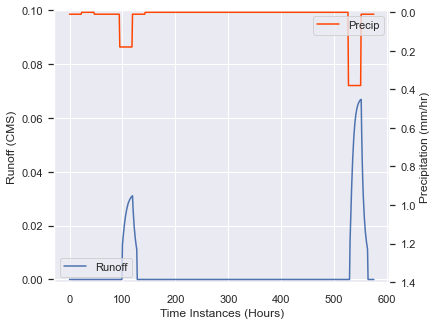

In [39]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt['Runoff (CMS)']); plt.ylim((-0.001,0.1)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CMS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt['Precip (mm/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (mm/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

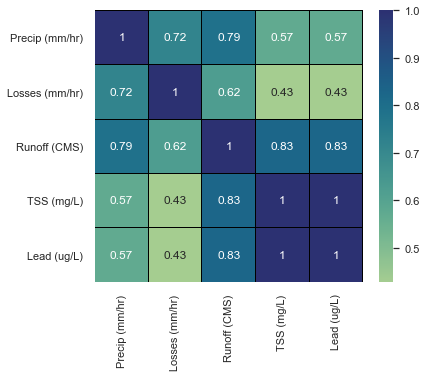

In [40]:
plt.figure(figsize=(6,5))
rpt.drop('Date', axis = 1)
sns.heatmap(rpt.corr(), annot = True, cmap = 'crest', linewidths = 0.01, linecolor ='black');

### swmmio Features

###### swmmio has no LID controls - However, it allows pandas dataframe functionality

In [63]:
# Instantiate a swmmio model object
model = sio.Model(inp_dir)
# Pandas dataframe with for nodes, links, and subcatchments
nodes = model.nodes.dataframe
links = model.links.dataframe
subs = model.subcatchments.dataframe
# All the Pandas functions can be used
subs.head().T

Name,S1,S2,S3,S4
Raingage,Gage1,Gage1,Gage1,Gage1
Outlet,J1,J2,J3,Out1
Area,148.26,165.88,307.71,203.2
PercImperv,56.86,35.41,60.04,52.37
Width,695.85,615.08,736.76,634.24
PercSlope,0.06,0.17,0.32,0.49
CurbLength,0,0,0,0
SnowPack,NaN,NaN,NaN,NaN
N-Imperv,0.012,0.012,0.012,0.012
N-Perv,0.13,0.13,0.13,0.13


In [31]:
# Write to a csv file
subs.T.to_csv('subcatcments.txt')
# Calculate average impervious area
imp = subs.PercImperv; print(imp)
avg_imp = subs.PercImperv.mean(); print('Avg. Impervious %:',avg_imp)
# Calculate weighted average impervious area
wt_avg_imp = (subs.Area * subs.PercImperv).sum()/len(subs); print('Wt. Avg. Impervious:',wt_avg_imp)

Name
S1    56.86
S2    35.41
S3    60.04
S4    52.37
Name: PercImperv, dtype: float64
Avg. Impervious %: 51.17
Wt. Avg. Impervious: 10855.0917


In [32]:
# from swmmio.graphics import swmm_graphics as sg
# sg.draw_model(model)

#### Linear Optimization (for Capstone)

In [33]:
import numpy as np
from scipy.optimize import linprog

In [34]:
# Objective function --> min(z) = 29x1-45x2+0x3+0x4 
# Constraints -->
    # x1-x2-3x3+0x4 <=5, -2x1+3x2+7x3-3x4 <=-10, 2x1+8x2+1x3+0x4 = 60, 4x1+4x2+0x3+1x4 = 60
# Bounds --> 0<=x1, 0<=x2<=6, x2<=0.5, -3<=x3

In [35]:
z = np.array([-29,-45,0,0]) # Objective function 
x_ub = np.array([[1,-1,-3,0], # Unblanced equations x-coefficient array (LHS)
                [-2,3,7,-3]]);
c_ub = np.array([5, -10]); # Unbalanced equations constant array (RHS)
x_eq = np.array([[2.0, 8.0, 1.0, 0.0], # Equality equations x-coefficient array (LHS)
               [4.0, 4.0, 0.0, 1.0]]);
c_eq = np.array([60.0, 60.0]) # Equality equations constant array (RHS)
x1_bounds = (0, None) # Bounds
x2_bounds = (0, 6)
x3_bounds = (-np.inf, 0.5)  # +/- np.inf can be used instead of None
x4_bounds = (-3, None)
bounds = np.array([x1_bounds, x2_bounds, x3_bounds, x4_bounds]) # Create a bounds array
result = linprog(z, A_ub=x_ub, b_ub=c_ub, A_eq=x_eq, b_eq=c_eq, bounds=bounds)
# for greater accuracy (will take longer time),, you can use additional argument of method='revised simplex'
print(result)

     con: array([9.79743930e-09, 1.04769242e-08])
     fun: -505.97435889005345
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 6.53052723e-10, -2.26972219e-09])
  status: 0
 success: True
       x: array([ 9.41025641,  5.17948718, -0.25641026,  1.64102564])


In [36]:
# Double check your results
x = np.array(result.x)
print(z @ x)
print(result.slack)
print(result.con)

-505.97435889005345
[ 6.53052723e-10 -2.26972219e-09]
[9.79743930e-09 1.04769242e-08]


#### Nonlinear Optimization

In [43]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
# Objective function --> min(z) = x1x4(x1+x2+x3)+x3
# Constraints -->
    # x1x2x3x4 <=25, x1^2+x2^2+x3^2+x4^2 =40
# Bounds --> 1<=x1,x2,x3,x4<=5
# Initial guess x0 = (1,5,5,1)

In [56]:
def objective(x): # Objective function
    x1=x[0];x2=x[1];x3=x[2];x4=x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x): 
    return x[0]*x[1]*x[2]*x[3]-25
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

In [57]:
x0 = [1,5,5,1]
objective(x0)

16

In [58]:
bnd = (1,5)
bnds = (bnd,bnd,bnd,bnd)
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'eq','fun':constraint2}
cons = [con1,con2]

In [59]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [60]:
print(sol)

     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])
